# Results experiments data effieciency

In [1]:
import os
import sys
import time
sys.path.extend(['..'])

import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amssymb}')

## Tables

In [3]:
res_path = '../../results/pretrained'

ece15_file = 'logitsJuan_ECE15_red_{}.csv' 
ece_file = 'logitsJuan_ECE_red_{}.csv'
nll_file = 'logitsJuan_NLL_red_{}.csv'
bri_file = 'logitsJuan_BRI_red_{}.csv'

In [4]:
ECE15s = [pd.read_csv(os.path.join(res_path, ece15_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']) for i in range(50)]
ECEs = [pd.read_csv(os.path.join(res_path, ece_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']) for i in range(50)]
NLLs = [pd.read_csv(os.path.join(res_path, nll_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']) for i in range(50)]
Bris = [pd.read_csv(os.path.join(res_path, bri_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']) for i in range(50)]

In [5]:
ECE15 = sum(ECE15s)/len(ECE15s)
ECE = sum(ECEs)/len(ECEs)
NLL = sum(NLLs)/len(NLLs)
Bri = sum(Bris)/len(Bris)

In [6]:
def highlight_min(s):
    '''
    highlight the minimum.
    '''
    is_max = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_max]

In [7]:
def highlight_min_br(s):
    print(s['ECE'])
    
    
    s['ECE'].style.apply(highlight_min, subset=s.select_dtypes(float))
    s['NLL'].style.apply(highlight_min, subset=s.select_dtypes(float))
    s['Brier'].style.apply(highlight_min, subset=s.select_dtypes(float))
      
    return s

## ECE

### CIFAR10
### N = 200

In [21]:
ECE.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-21-005a454a0045>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,2.835130,2.791077,10.709518,4.450539,2.883827,4.605082,1.929727,3.115250
TS,1.723617,1.704671,2.690254,1.808517,1.343081,2.587444,1.099571,1.385260
ETS,2.236583,2.857151,3.228896,2.161017,1.718713,3.158413,2.238390,1.885688
MIR,2.067308,1.910098,2.547432,2.518381,1.931112,2.563669,1.790028,1.878996
BTS,4.014272,3.987540,7.877050,5.110723,4.122277,5.422182,3.561397,4.080146
HTS_torch,1.770965,1.563198,2.508473,2.032950,1.514985,2.401577,1.233104,1.616685
LTS_torch,1.957166,1.743529,2.919414,2.260575,1.865804,2.825085,1.460090,1.920716
HnLTS_torch,3.003468,2.664720,3.187057,3.108581,3.000748,3.766450,2.459478,2.961668
PTS,3.687239,3.617311,5.471090,4.450385,3.949350,4.959512,2.732688,3.767868
PTS_ece,3.075115,3.046218,10.040451,4.666144,3.041055,4.960423,2.434088,3.371303


In [22]:
print(ECE.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &   TS &  ETS &  MIR &  BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &  PTS &  PTS\_ece \\
Model             &               &      &      &      &      &            &            &              &      &          \\
\midrule
densenet-121      &          2.84 & 1.72 & 2.24 & 2.07 & 4.01 &       1.77 &       1.96 &         3.00 & 3.69 &     3.08 \\
densenet-169      &          2.79 & 1.70 & 2.86 & 1.91 & 3.99 &       1.56 &       1.74 &         2.66 & 3.62 &     3.05 \\
resnet-50         &         10.71 & 2.69 & 3.23 & 2.55 & 7.88 &       2.51 &       2.92 &         3.19 & 5.47 &    10.04 \\
resnet-101        &          4.45 & 1.81 & 2.16 & 2.52 & 5.11 &       2.03 &       2.26 &         3.11 & 4.45 &     4.67 \\
resnext-29\_8x16   &          2.88 & 1.34 & 1.72 & 1.93 & 4.12 &       1.51 &       1.87 &         3.00 & 3.95 &     3.04 \\
vgg-19            &          4.61 & 2.59 & 3.16 & 2.56 & 5.42 &       2.40 &       2.83 &      

<ipython-input-22-30727d1e912c>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f"))


In [23]:
print((ECE.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar10', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f")) 

\begin{tabular}{lr}
\toprule
{} &    0 \\
\midrule
Uncalibrated & 1.00 \\
TS           & 0.49 \\
ETS          & 0.71 \\
MIR          & 0.62 \\
BTS          & 1.31 \\
HTS\_torch    & 0.51 \\
LTS\_torch    & 0.59 \\
HnLTS\_torch  & 0.89 \\
PTS          & 1.15 \\
PTS\_ece      & 1.08 \\
\bottomrule
\end{tabular}



<ipython-input-23-8e1b5894bbba>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((ECE.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar10', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f"))


### N = 1000

In [26]:
ECE.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-26-5e485d282031>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,2.835130,2.791077,10.709518,4.450539,2.883827,4.605082,1.929727,3.115250
TS,1.516986,1.547783,2.562443,1.455828,1.039542,2.543163,0.866227,1.157414
ETS,2.286332,2.401543,2.753676,1.569707,1.084605,3.195734,1.569170,1.230397
MIR,1.641718,1.443770,1.829293,2.010689,1.377141,1.867853,1.358934,1.365853
BTS,2.117717,1.793714,3.188118,2.720910,2.240237,2.653198,1.677401,2.299267
HTS_torch,1.508695,1.318161,2.157802,1.659370,1.276548,1.985885,0.905538,1.288777
LTS_torch,1.297103,1.203859,2.378406,1.635177,1.292853,1.989630,0.879893,1.323859
HnLTS_torch,1.492890,1.351626,2.223634,1.731286,1.402906,1.945491,1.136919,1.391502
PTS,1.338041,1.220115,1.903821,1.526498,1.246767,1.718328,0.973654,1.290720
PTS_ece,3.093340,3.080779,7.791115,4.089132,3.158354,4.882291,2.243861,3.493211


In [27]:
print(ECE.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &   TS &  ETS &  MIR &  BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &  PTS &  PTS\_ece \\
Model             &               &      &      &      &      &            &            &              &      &          \\
\midrule
densenet-121      &          2.84 & 1.52 & 2.29 & 1.64 & 2.12 &       1.51 &       1.30 &         1.49 & 1.34 &     3.09 \\
densenet-169      &          2.79 & 1.55 & 2.40 & 1.44 & 1.79 &       1.32 &       1.20 &         1.35 & 1.22 &     3.08 \\
resnet-50         &         10.71 & 2.56 & 2.75 & 1.83 & 3.19 &       2.16 &       2.38 &         2.22 & 1.90 &     7.79 \\
resnet-101        &          4.45 & 1.46 & 1.57 & 2.01 & 2.72 &       1.66 &       1.64 &         1.73 & 1.53 &     4.09 \\
resnext-29\_8x16   &          2.88 & 1.04 & 1.08 & 1.38 & 2.24 &       1.28 &       1.29 &         1.40 & 1.25 &     3.16 \\
vgg-19            &          4.61 & 2.54 & 3.20 & 1.87 & 2.65 &       1.99 &       1.99 &      

<ipython-input-27-8c0ed2782bc6>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f"))


In [28]:
print((ECE.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar10', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f")) 

\begin{tabular}{lr}
\toprule
{} &    0 \\
\midrule
Uncalibrated & 1.00 \\
TS           & 0.42 \\
ETS          & 0.57 \\
MIR          & 0.47 \\
BTS          & 0.66 \\
HTS\_torch    & 0.42 \\
LTS\_torch    & 0.40 \\
HnLTS\_torch  & 0.44 \\
PTS          & 0.39 \\
PTS\_ece      & 1.04 \\
\bottomrule
\end{tabular}



<ipython-input-28-45fb0e0a961b>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((ECE.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar10', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f"))


### CIFAR100
### N = 200

In [10]:
ECE.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-10-d2a4c3a16739>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,8.760250,8.932411,11.446499,9.692425,17.631318,5.187933,14.784526
TS,4.011000,4.223397,2.767326,3.392851,5.157023,4.878515,4.519687
ETS,3.439027,3.443420,3.173054,3.226965,5.530938,4.177908,3.827982
MIR,5.450226,5.669903,4.620815,4.933940,4.723731,4.840008,6.321737
BTS,8.777622,8.562836,8.586872,8.553375,8.463621,7.929566,9.642693
HTS_torch,3.494077,3.679460,3.105152,2.725624,4.409595,4.011586,4.472789
LTS_torch,18.999962,18.927165,17.427316,19.128765,14.553788,13.848705,15.712338
HnLTS_torch,17.724695,17.186414,19.184148,18.162483,15.326563,15.354260,17.468368
PTS,4.772959,5.192049,3.978145,3.553290,4.480539,5.336253,5.226949
PTS_ece,9.012788,9.762654,9.941842,7.127628,11.706501,8.116562,9.869653


In [11]:
print(ECE.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &   TS &  ETS &  MIR &  BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &  PTS &  PTS\_ece \\
Model             &               &      &      &      &      &            &            &              &      &          \\
\midrule
densenet-121      &          8.76 & 4.01 & 3.44 & 5.45 & 8.78 &       3.49 &      19.00 &        17.72 & 4.77 &     9.01 \\
densenet-169      &          8.93 & 4.22 & 3.44 & 5.67 & 8.56 &       3.68 &      18.93 &        17.19 & 5.19 &     9.76 \\
resnet-101        &         11.45 & 2.77 & 3.17 & 4.62 & 8.59 &       3.11 &      17.43 &        19.18 & 3.98 &     9.94 \\
resnext-29\_8x16   &          9.69 & 3.39 & 3.23 & 4.93 & 8.55 &       2.73 &      19.13 &        18.16 & 3.55 &     7.13 \\
vgg-19            &         17.63 & 5.16 & 5.53 & 4.72 & 8.46 &       4.41 &      14.55 &        15.33 & 4.48 &    11.71 \\
wide-resnet-28x10 &          5.19 & 4.88 & 4.18 & 4.84 & 7.93 &       4.01 &      13.85 &      

<ipython-input-11-4578becefa49>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f"))


In [15]:
print((ECE.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar100', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f")) 

\begin{tabular}{lr}
\toprule
{} &    0 \\
\midrule
Uncalibrated & 1.00 \\
TS           & 0.44 \\
ETS          & 0.40 \\
MIR          & 0.54 \\
BTS          & 0.89 \\
HTS\_torch    & 0.38 \\
LTS\_torch    & 1.76 \\
HnLTS\_torch  & 1.79 \\
PTS          & 0.50 \\
PTS\_ece      & 0.95 \\
\bottomrule
\end{tabular}



<ipython-input-15-df90a7ff9231>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((ECE.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar100', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f"))


### N = 1000

In [29]:
ECE.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-29-f07040a976f2>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,8.760250,8.932411,11.446499,9.692425,17.631318,5.187933,14.784526
TS,3.851120,4.073002,2.284268,3.201650,5.077161,4.691608,4.342255
ETS,3.010114,2.972343,2.259193,2.803656,5.251347,3.719064,3.161165
MIR,4.847701,5.097054,3.882380,4.425216,4.359767,4.275050,5.785539
BTS,3.782325,3.818524,3.319552,3.236600,4.200872,3.792160,4.461904
HTS_torch,3.203458,3.309044,2.468509,2.263251,4.017510,3.592643,4.088623
LTS_torch,5.246724,5.312964,4.034179,4.823100,3.999541,5.256206,5.456287
HnLTS_torch,4.762597,5.040581,4.196660,4.479122,4.609989,4.556388,4.997980
PTS,3.213183,3.240551,2.089938,2.058074,3.956942,3.382721,4.205544
PTS_ece,5.671504,4.777208,4.081827,3.128146,6.139364,6.156050,7.890604


In [30]:
print(ECE.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &   TS &  ETS &  MIR &  BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &  PTS &  PTS\_ece \\
Model             &               &      &      &      &      &            &            &              &      &          \\
\midrule
densenet-121      &          8.76 & 3.85 & 3.01 & 4.85 & 3.78 &       3.20 &       5.25 &         4.76 & 3.21 &     5.67 \\
densenet-169      &          8.93 & 4.07 & 2.97 & 5.10 & 3.82 &       3.31 &       5.31 &         5.04 & 3.24 &     4.78 \\
resnet-101        &         11.45 & 2.28 & 2.26 & 3.88 & 3.32 &       2.47 &       4.03 &         4.20 & 2.09 &     4.08 \\
resnext-29\_8x16   &          9.69 & 3.20 & 2.80 & 4.43 & 3.24 &       2.26 &       4.82 &         4.48 & 2.06 &     3.13 \\
vgg-19            &         17.63 & 5.08 & 5.25 & 4.36 & 4.20 &       4.02 &       4.00 &         4.61 & 3.96 &     6.14 \\
wide-resnet-28x10 &          5.19 & 4.69 & 3.72 & 4.28 & 3.79 &       3.59 &       5.26 &      

<ipython-input-30-b5d5e6ef8ec1>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f"))


In [31]:
print((ECE.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar100', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f")) 

\begin{tabular}{lr}
\toprule
{} &    0 \\
\midrule
Uncalibrated & 1.00 \\
TS           & 0.42 \\
ETS          & 0.34 \\
MIR          & 0.48 \\
BTS          & 0.39 \\
HTS\_torch    & 0.34 \\
LTS\_torch    & 0.52 \\
HnLTS\_torch  & 0.49 \\
PTS          & 0.33 \\
PTS\_ece      & 0.56 \\
\bottomrule
\end{tabular}



<ipython-input-31-792b4fca2a55>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((ECE.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar100', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f"))


## NLL
### N = 200

In [19]:
NLL.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-19-32f3cb4cfc38>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.188129,0.187019,0.789676,0.304690,0.199662,0.299754,0.149671,0.206792
TS,0.165442,0.163329,0.448856,0.219894,0.166784,0.237656,0.138076,0.166195
ETS,0.170854,0.174762,0.455317,0.224784,0.173367,0.242224,0.147569,0.174575
MIR,0.256431,0.254100,0.486115,0.342683,0.264473,0.317337,0.217656,0.262248
BTS,0.633128,0.587672,1.465263,0.781665,0.646458,0.860638,0.495217,0.628604
HTS_torch,0.167098,0.164592,0.448940,0.225559,0.169836,0.238467,0.145657,0.176638
LTS_torch,0.251056,0.228509,0.504107,0.281128,0.252259,0.330368,0.195503,0.252478
HnLTS_torch,0.391800,0.333542,0.524088,0.402269,0.396817,0.485835,0.297100,0.392683
PTS,0.429736,0.400842,nan,0.518852,0.484985,0.569383,0.292953,0.472806
PTS_ece,0.226343,0.234197,0.881041,0.390248,0.228209,0.398078,0.182998,0.253296


In [20]:
print(NLL.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.1881 & 0.1654 & 0.1709 & 0.2564 & 0.6331 &     0.1671 &     0.2511 &       0.3918 & 0.4297 &   0.2263 \\
densenet-169      &        0.1870 & 0.1633 & 0.1748 & 0.2541 & 0.5877 &     0.1646 &     0.2285 &       0.3335 & 0.4008 &   0.2342 \\
resnet-50         &        0.7897 & 0.4489 & 0.4553 & 0.4861 & 1.4653 &     0.4489 &     0.5041 &       0.5241 &    NaN &   0.8810 \\
resnet-101        &        0.3047 & 0.2199 & 0.2248 & 0.3427 & 0.7817 &     0.2256 &     0.2811 &       0.4023 & 0.5189 &   0.3902 \\
resnext-29\_8x16   &        0.1997 & 0.1668 & 0.1734 & 0.2645 & 0.6465 &     0.1698 &     0.2523 &       0.3968 & 0.4850 &   0.2282 \\
vgg-19            &      

<ipython-input-20-d1046105e52d>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(NLL.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [32]:
print((NLL.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar10', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.7997 \\
ETS          & 0.8329 \\
MIR          & 1.1960 \\
BTS          & 2.9233 \\
HTS\_torch    & 0.8188 \\
LTS\_torch    & 1.1263 \\
HnLTS\_torch  & 1.6678 \\
PTS          & 2.1004 \\
PTS\_ece      & 1.2213 \\
\bottomrule
\end{tabular}



<ipython-input-32-e0b76037574e>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((NLL.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar10', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### N = 1000

In [33]:
NLL.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-33-0bc440dc303f>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.188129,0.187019,0.789676,0.304690,0.199662,0.299754,0.149671,0.206792
TS,0.162139,0.161080,0.447658,0.216566,0.162425,0.235808,0.136395,0.163684
ETS,0.168464,0.168536,0.451974,0.219869,0.163300,0.242077,0.141927,0.165345
MIR,0.185208,0.173091,0.448334,0.245812,0.180145,0.236160,0.153886,0.187698
BTS,0.314249,0.297291,0.599928,0.406894,0.383542,0.414594,0.257504,0.374695
HTS_torch,0.161777,0.159823,0.446130,0.217467,0.163493,0.233663,0.136714,0.164242
LTS_torch,0.165132,0.164939,0.444087,0.218760,0.171854,0.237117,0.138941,0.170053
HnLTS_torch,0.170976,0.170955,0.443796,0.221672,0.177505,0.242589,0.149119,0.172954
PTS,0.164829,0.159447,0.447624,0.220041,0.173037,0.235216,0.137982,0.168952
PTS_ece,0.233140,0.252464,0.761329,0.325464,0.242015,0.399143,0.172967,0.281254


In [34]:
print(NLL.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.1881 & 0.1621 & 0.1685 & 0.1852 & 0.3142 &     0.1618 &     0.1651 &       0.1710 & 0.1648 &   0.2331 \\
densenet-169      &        0.1870 & 0.1611 & 0.1685 & 0.1731 & 0.2973 &     0.1598 &     0.1649 &       0.1710 & 0.1594 &   0.2525 \\
resnet-50         &        0.7897 & 0.4477 & 0.4520 & 0.4483 & 0.5999 &     0.4461 &     0.4441 &       0.4438 & 0.4476 &   0.7613 \\
resnet-101        &        0.3047 & 0.2166 & 0.2199 & 0.2458 & 0.4069 &     0.2175 &     0.2188 &       0.2217 & 0.2200 &   0.3255 \\
resnext-29\_8x16   &        0.1997 & 0.1624 & 0.1633 & 0.1801 & 0.3835 &     0.1635 &     0.1719 &       0.1775 & 0.1730 &   0.2420 \\
vgg-19            &      

<ipython-input-34-fa5fd75c83e0>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(NLL.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [35]:
print((NLL.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar10', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.7880 \\
ETS          & 0.8080 \\
MIR          & 0.8638 \\
BTS          & 1.5240 \\
HTS\_torch    & 0.7874 \\
LTS\_torch    & 0.8053 \\
HnLTS\_torch  & 0.8304 \\
PTS          & 0.8010 \\
PTS\_ece      & 1.2101 \\
\bottomrule
\end{tabular}



<ipython-input-35-335c477c56dc>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((NLL.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar10', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### CIFAR100
### N = 200

In [21]:
NLL.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-21-248e2ff71441>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.893868,0.874816,1.134310,0.939844,1.541421,0.817338,1.224773
TS,0.837381,0.818090,1.003558,0.824766,1.201277,0.816850,0.907272
ETS,0.859460,0.835858,1.014650,0.842048,1.209925,0.836166,0.932271
MIR,0.898220,0.873336,1.094177,0.897828,1.232773,0.866991,0.977439
BTS,1.701070,1.697820,1.857224,1.649491,1.849899,1.555164,1.906056
HTS_torch,0.828496,0.808870,1.005909,0.817359,1.197651,0.792013,0.904560
LTS_torch,2.235281,2.193461,2.344671,2.314424,2.049016,1.666789,2.056997
HnLTS_torch,2.377560,2.292747,2.752504,2.489032,2.225955,2.021450,2.455465
PTS,0.909093,0.903892,1.072123,0.869089,1.217708,0.909289,0.943809
PTS_ece,1.014703,0.984523,1.233597,0.963513,1.670109,0.937952,1.212140


In [22]:
print(NLL.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.8939 & 0.8374 & 0.8595 & 0.8982 & 1.7011 &     0.8285 &     2.2353 &       2.3776 & 0.9091 &   1.0147 \\
densenet-169      &        0.8748 & 0.8181 & 0.8359 & 0.8733 & 1.6978 &     0.8089 &     2.1935 &       2.2927 & 0.9039 &   0.9845 \\
resnet-101        &        1.1343 & 1.0036 & 1.0147 & 1.0942 & 1.8572 &     1.0059 &     2.3447 &       2.7525 & 1.0721 &   1.2336 \\
resnext-29\_8x16   &        0.9398 & 0.8248 & 0.8420 & 0.8978 & 1.6495 &     0.8174 &     2.3144 &       2.4890 & 0.8691 &   0.9635 \\
vgg-19            &        1.5414 & 1.2013 & 1.2099 & 1.2328 & 1.8499 &     1.1977 &     2.0490 &       2.2260 & 1.2177 &   1.6701 \\
wide-resnet-28x10 &      

<ipython-input-22-d05c8fd369d6>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(NLL.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [14]:
print((NLL.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar100', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.8791 \\
ETS          & 0.8967 \\
MIR          & 0.9402 \\
BTS          & 1.6993 \\
HTS\_torch    & 0.8704 \\
LTS\_torch    & 2.0837 \\
HnLTS\_torch  & 2.3254 \\
PTS          & 0.9419 \\
PTS\_ece      & 1.0849 \\
\bottomrule
\end{tabular}



<ipython-input-14-c7dd0ece1194>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((NLL.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar100', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### N = 1000

In [36]:
NLL.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-36-b14db43d4f32>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.893868,0.874816,1.134310,0.939844,1.541421,0.817338,1.224773
TS,0.835913,0.816066,1.001028,0.822407,1.199812,0.813838,0.905810
ETS,0.860139,0.832553,1.008412,0.840743,1.206361,0.833434,0.925852
MIR,0.848517,0.827132,1.019172,0.844268,1.192006,0.807404,0.931295
BTS,0.922657,0.924033,1.097875,0.921845,1.299330,0.925697,0.988316
HTS_torch,0.826027,0.807048,1.001207,0.813309,1.194722,0.787328,0.899726
LTS_torch,0.902101,0.879724,1.063575,0.901119,1.215813,0.859963,0.953266
HnLTS_torch,0.884899,0.868235,1.066323,0.893774,1.219420,0.824208,0.930950
PTS,0.816070,0.797111,0.999169,0.807169,1.179924,0.773600,0.884322
PTS_ece,0.938254,0.857714,1.038470,0.823766,1.245432,0.864394,1.197662


In [37]:
print(NLL.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.8939 & 0.8359 & 0.8601 & 0.8485 & 0.9227 &     0.8260 &     0.9021 &       0.8849 & 0.8161 &   0.9383 \\
densenet-169      &        0.8748 & 0.8161 & 0.8326 & 0.8271 & 0.9240 &     0.8070 &     0.8797 &       0.8682 & 0.7971 &   0.8577 \\
resnet-101        &        1.1343 & 1.0010 & 1.0084 & 1.0192 & 1.0979 &     1.0012 &     1.0636 &       1.0663 & 0.9992 &   1.0385 \\
resnext-29\_8x16   &        0.9398 & 0.8224 & 0.8407 & 0.8443 & 0.9218 &     0.8133 &     0.9011 &       0.8938 & 0.8072 &   0.8238 \\
vgg-19            &        1.5414 & 1.1998 & 1.2064 & 1.1920 & 1.2993 &     1.1947 &     1.2158 &       1.2194 & 1.1799 &   1.2454 \\
wide-resnet-28x10 &      

<ipython-input-37-74d7371fbebe>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(NLL.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [38]:
print((NLL.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar100', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.8770 \\
ETS          & 0.8937 \\
MIR          & 0.8876 \\
BTS          & 0.9742 \\
HTS\_torch    & 0.8668 \\
LTS\_torch    & 0.9329 \\
HnLTS\_torch  & 0.9190 \\
PTS          & 0.8568 \\
PTS\_ece      & 0.9522 \\
\bottomrule
\end{tabular}



<ipython-input-38-3337e9637c12>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((NLL.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar100', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


## Brier

In [23]:
Bri.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-23-429ee07cfed1>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  Bri.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.076359,0.075375,0.239194,0.110169,0.082816,0.110094,0.062887,0.081958
TS,0.073409,0.071947,0.203826,0.101623,0.078897,0.102514,0.061002,0.077155
ETS,0.073294,0.072026,0.203864,0.101941,0.080140,0.101208,0.061741,0.078056
MIR,0.074931,0.073749,0.205441,0.104099,0.081467,0.102259,0.063700,0.079310
BTS,0.085208,0.084869,0.240877,0.119986,0.094583,0.119590,0.074155,0.091686
HTS_torch,0.073402,0.071755,0.203740,0.101976,0.079198,0.101854,0.061123,0.077577
LTS_torch,0.076644,0.074592,0.209168,0.105101,0.083433,0.106545,0.063772,0.081591
HnLTS_torch,0.080545,0.078014,0.209348,0.108209,0.088376,0.109910,0.067492,0.085853
PTS,0.084093,0.083303,nan,0.116055,0.093896,0.116638,0.069404,0.090603
PTS_ece,0.078086,0.077373,0.237912,0.112943,0.084428,0.113332,0.065105,0.084173


In [24]:
print(Bri.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.0764 & 0.0734 & 0.0733 & 0.0749 & 0.0852 &     0.0734 &     0.0766 &       0.0805 & 0.0841 &   0.0781 \\
densenet-169      &        0.0754 & 0.0719 & 0.0720 & 0.0737 & 0.0849 &     0.0718 &     0.0746 &       0.0780 & 0.0833 &   0.0774 \\
resnet-50         &        0.2392 & 0.2038 & 0.2039 & 0.2054 & 0.2409 &     0.2037 &     0.2092 &       0.2093 &    NaN &   0.2379 \\
resnet-101        &        0.1102 & 0.1016 & 0.1019 & 0.1041 & 0.1200 &     0.1020 &     0.1051 &       0.1082 & 0.1161 &   0.1129 \\
resnext-29\_8x16   &        0.0828 & 0.0789 & 0.0801 & 0.0815 & 0.0946 &     0.0792 &     0.0834 &       0.0884 & 0.0939 &   0.0844 \\
vgg-19            &      

<ipython-input-24-3276b4ccb6aa>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(Bri.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [17]:
print((Bri.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar10', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.9357 \\
ETS          & 0.9393 \\
MIR          & 0.9571 \\
BTS          & 1.1080 \\
HTS\_torch    & 0.9363 \\
LTS\_torch    & 0.9758 \\
HnLTS\_torch  & 1.0167 \\
PTS          & 1.0946 \\
PTS\_ece      & 1.0225 \\
\bottomrule
\end{tabular}



<ipython-input-17-ed76c008e28d>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((Bri.loc[('cifar10', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar10', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### N = 1000

In [39]:
Bri.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-39-575dad2e7446>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  Bri.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.076359,0.075375,0.239194,0.110169,0.082816,0.110094,0.062887,0.081958
TS,0.072907,0.071780,0.203717,0.101131,0.078358,0.101919,0.060847,0.076820
ETS,0.072557,0.071250,0.203001,0.101072,0.078419,0.100752,0.060971,0.076649
MIR,0.073266,0.071921,0.203232,0.102254,0.079173,0.100442,0.061644,0.077426
BTS,0.075481,0.073505,0.210968,0.106866,0.083825,0.105313,0.063780,0.082325
HTS_torch,0.072733,0.071394,0.203362,0.101242,0.078633,0.100926,0.060875,0.076954
LTS_torch,0.073049,0.071893,0.202977,0.101125,0.079253,0.101750,0.060942,0.077411
HnLTS_torch,0.073161,0.071770,0.202642,0.101170,0.079628,0.101065,0.061432,0.077473
PTS,0.072550,0.071186,0.203235,0.101143,0.078965,0.100687,0.060884,0.077149
PTS_ece,0.078236,0.077737,0.228126,0.110131,0.085327,0.113076,0.064398,0.085128


In [40]:
print(Bri.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

<ipython-input-40-cce85817fceb>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(Bri.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.0764 & 0.0729 & 0.0726 & 0.0733 & 0.0755 &     0.0727 &     0.0730 &       0.0732 & 0.0725 &   0.0782 \\
densenet-169      &        0.0754 & 0.0718 & 0.0713 & 0.0719 & 0.0735 &     0.0714 &     0.0719 &       0.0718 & 0.0712 &   0.0777 \\
resnet-50         &        0.2392 & 0.2037 & 0.2030 & 0.2032 & 0.2110 &     0.2034 &     0.2030 &       0.2026 & 0.2032 &   0.2281 \\
resnet-101        &        0.1102 & 0.1011 & 0.1011 & 0.1023 & 0.1069 &     0.1012 &     0.1011 &       0.1012 & 0.1011 &   0.1101 \\
resnext-29\_8x16   &        0.0828 & 0.0784 & 0.0784 & 0.0792 & 0.0838 &     0.0786 &     0.0793 &       0.0796 & 0.0790 &   0.0853 \\
vgg-19            &      

In [41]:
print((Bri.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar10', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.9317 \\
ETS          & 0.9286 \\
MIR          & 0.9356 \\
BTS          & 0.9754 \\
HTS\_torch    & 0.9303 \\
LTS\_torch    & 0.9340 \\
HnLTS\_torch  & 0.9347 \\
PTS          & 0.9300 \\
PTS\_ece      & 1.0162 \\
\bottomrule
\end{tabular}



<ipython-input-41-eb99ac8d7fe2>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((Bri.loc[('cifar10', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar10', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### CIFAR100

In [25]:
Bri.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-25-be8161c03fed>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  Bri.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.317058,0.314196,0.405327,0.327484,0.443283,0.289225,0.370023
TS,0.305157,0.302160,0.382368,0.310124,0.392150,0.289219,0.328216
ETS,0.305262,0.301938,0.382982,0.310283,0.391694,0.289123,0.328437
MIR,0.307654,0.304656,0.387384,0.314205,0.390798,0.288005,0.333188
BTS,0.335522,0.330615,0.416066,0.340191,0.411843,0.312006,0.366726
HTS_torch,0.304928,0.302039,0.382739,0.309728,0.390722,0.287741,0.330554
LTS_torch,0.410883,0.407302,0.481336,0.421528,0.458771,0.355657,0.410684
HnLTS_torch,0.394847,0.387620,0.484203,0.407917,0.455565,0.358320,0.415983
PTS,0.311789,0.309776,0.388931,0.313049,0.391077,0.295430,0.332716
PTS_ece,0.323778,0.322415,0.409553,0.324417,0.424593,0.299598,0.354430


In [26]:
print(Bri.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.3171 & 0.3052 & 0.3053 & 0.3077 & 0.3355 &     0.3049 &     0.4109 &       0.3948 & 0.3118 &   0.3238 \\
densenet-169      &        0.3142 & 0.3022 & 0.3019 & 0.3047 & 0.3306 &     0.3020 &     0.4073 &       0.3876 & 0.3098 &   0.3224 \\
resnet-101        &        0.4053 & 0.3824 & 0.3830 & 0.3874 & 0.4161 &     0.3827 &     0.4813 &       0.4842 & 0.3889 &   0.4096 \\
resnext-29\_8x16   &        0.3275 & 0.3101 & 0.3103 & 0.3142 & 0.3402 &     0.3097 &     0.4215 &       0.4079 & 0.3130 &   0.3244 \\
vgg-19            &        0.4433 & 0.3921 & 0.3917 & 0.3908 & 0.4118 &     0.3907 &     0.4588 &       0.4556 & 0.3911 &   0.4246 \\
wide-resnet-28x10 &      

<ipython-input-26-32f00b506821>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(Bri.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [18]:
print((Bri.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar100', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.9409 \\
ETS          & 0.9410 \\
MIR          & 0.9476 \\
BTS          & 1.0250 \\
HTS\_torch    & 0.9404 \\
LTS\_torch    & 1.2059 \\
HnLTS\_torch  & 1.1872 \\
PTS          & 0.9554 \\
PTS\_ece      & 1.0000 \\
\bottomrule
\end{tabular}



<ipython-input-18-c1d6807264e0>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((Bri.loc[('cifar100', 200)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar100', 200)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### N = 1000

In [42]:
Bri.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-42-95d886419b4c>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  Bri.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.317058,0.314196,0.405327,0.327484,0.443283,0.289225,0.370023
TS,0.304846,0.301722,0.381781,0.309636,0.392014,0.288677,0.327842
ETS,0.304588,0.301266,0.381783,0.309542,0.391076,0.287973,0.327317
MIR,0.305680,0.302409,0.384669,0.312372,0.389599,0.285866,0.331188
BTS,0.309505,0.305381,0.387376,0.314205,0.391665,0.290531,0.334495
HTS_torch,0.304710,0.301438,0.381967,0.309254,0.390360,0.287110,0.329545
LTS_torch,0.313019,0.308686,0.390764,0.319654,0.394957,0.291927,0.331681
HnLTS_torch,0.312605,0.308535,0.390762,0.320115,0.394272,0.290024,0.331230
PTS,0.302381,0.298621,0.380975,0.307243,0.386514,0.283620,0.324983
PTS_ece,0.311740,0.305455,0.386680,0.309574,0.394593,0.293491,0.347472


In [43]:
print(Bri.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.3171 & 0.3048 & 0.3046 & 0.3057 & 0.3095 &     0.3047 &     0.3130 &       0.3126 & 0.3024 &   0.3117 \\
densenet-169      &        0.3142 & 0.3017 & 0.3013 & 0.3024 & 0.3054 &     0.3014 &     0.3087 &       0.3085 & 0.2986 &   0.3055 \\
resnet-101        &        0.4053 & 0.3818 & 0.3818 & 0.3847 & 0.3874 &     0.3820 &     0.3908 &       0.3908 & 0.3810 &   0.3867 \\
resnext-29\_8x16   &        0.3275 & 0.3096 & 0.3095 & 0.3124 & 0.3142 &     0.3093 &     0.3197 &       0.3201 & 0.3072 &   0.3096 \\
vgg-19            &        0.4433 & 0.3920 & 0.3911 & 0.3896 & 0.3917 &     0.3904 &     0.3950 &       0.3943 & 0.3865 &   0.3946 \\
wide-resnet-28x10 &      

<ipython-input-43-cb209d075189>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(Bri.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [44]:
print((Bri.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar100', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.9397 \\
ETS          & 0.9384 \\
MIR          & 0.9417 \\
BTS          & 0.9508 \\
HTS\_torch    & 0.9387 \\
LTS\_torch    & 0.9581 \\
HnLTS\_torch  & 0.9567 \\
PTS          & 0.9304 \\
PTS\_ece      & 0.9570 \\
\bottomrule
\end{tabular}



<ipython-input-44-c165c64eb8ce>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((Bri.loc[('cifar100', 1000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar100', 1000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


## Graphs

In [14]:
res_path = '../../results/data_eff'

ece_file = 'data_eff_ECE_reg_{}.csv'
nll_file = 'data_eff_NLL_reg_{}.csv'
bri_file = 'data_eff_BRI_reg_{}.csv'

In [15]:
ECEs = [pd.read_csv(os.path.join(res_path, ece_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Model', 'N']) for i in range(20)]
NLLs = [pd.read_csv(os.path.join(res_path, nll_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Model', 'N']) for i in range(20)]
Bris = [pd.read_csv(os.path.join(res_path, bri_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Model', 'N']) for i in range(20)]

In [5]:
ECE = sum(ECEs)/len(ECEs)
NLL = sum(NLLs)/len(NLLs)
Bri = sum(Bris)/len(Bris)

In [6]:
color_palette_J = {
                     'black': '#000000',
                     'orange': '#E69F00',
                     'blue': '#56B4E9',
                     'green': '#009E73',
                     'orange': '#F0E442',
                     'dark_blue': '#0072B2',
                     'dark_orange': '#D55E00',
                     'pink': '#CC79A7',
                     'white': '#111111',
                     'grey': 'grey'
                   }

In [7]:
models = ['TS', 'ETS', 'MIR', 'BTS', 'HTS', 'LTS', 'HnLTS', 'PTS', 'PTS_ece']
labels = ['TS', 'ETS', 'MIR', 'BTS', 'HTS', 'LTS', 'HnLTS', 'PTS', 'PTS (ece)']
markers = ['o', '^', 's', 'p', 'X', 'd', '*', '+']

In [8]:
colors = ['tab:red', color_palette_J['green'], 'y', color_palette_J['pink'], 'aquamarine', 'lightseagreen', 'teal', 'midnightblue', color_palette_J['dark_orange']]

## ECE Graphics

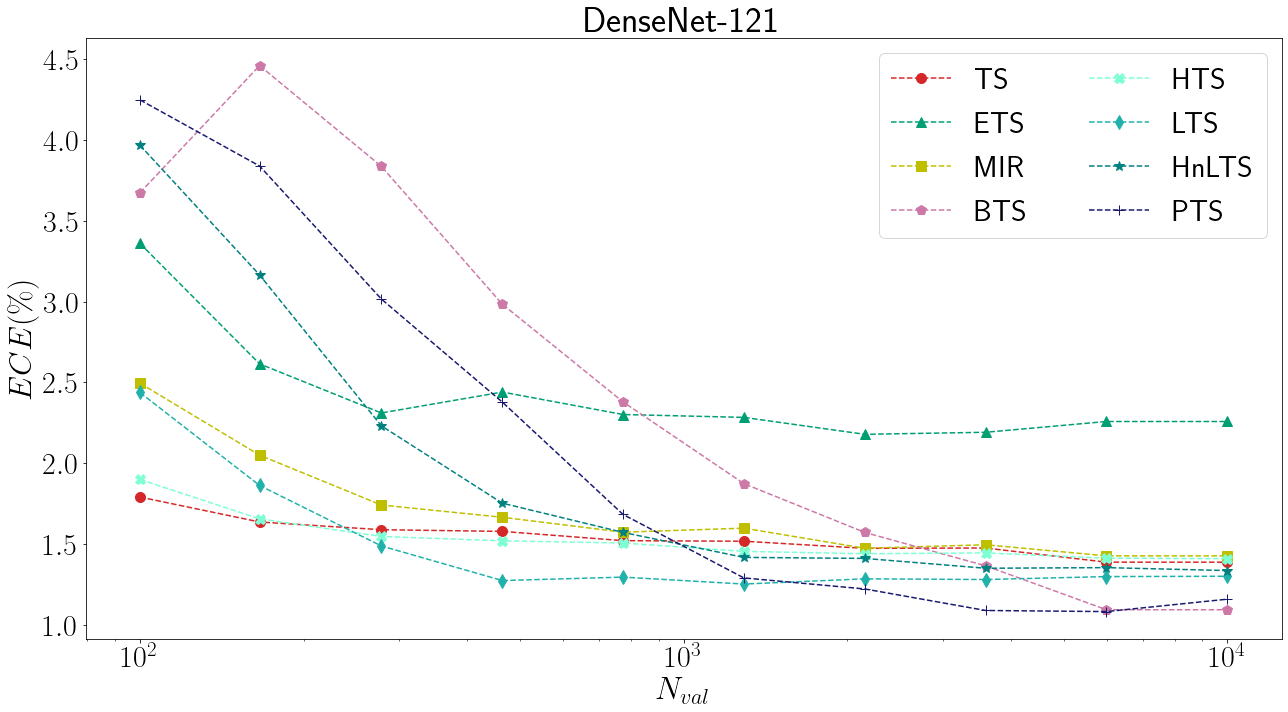

In [9]:
curr = ECE.loc["densenet-121"]
Ns = curr.index.values
uncal = curr.loc[Ns[0], 'Uncalibrated']
eces = [curr[model].values for model in models]

fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color, marker) in enumerate(zip(labels, colors, markers)):
    ax.plot(Ns, eces[i], ls='--', marker=marker, markersize=10, c=color, label=label)

ax.set_xscale('log')

ax.set_title('DenseNet-121', fontsize=36)

ax.set_ylabel('$ECE (\%)$', fontsize=32)
ax.set_xlabel('$N_{val}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=30, ncol=2)

plt.tight_layout()
plt.show();

plt.show()

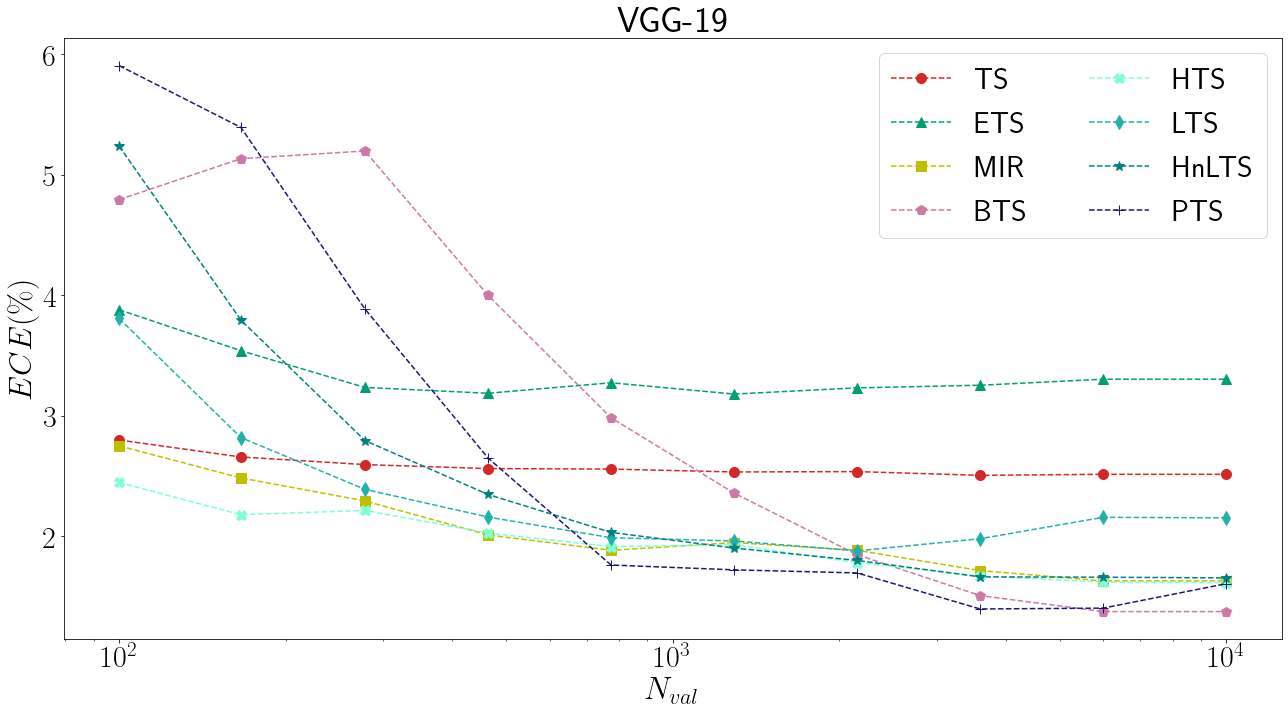

In [10]:
curr = ECE.loc["vgg-19"]
Ns = curr.index.values
uncal = curr.loc[Ns[0], 'Uncalibrated']
eces = [curr[model].values for model in models]

fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color, marker) in enumerate(zip(labels, colors, markers)):
    ax.plot(Ns, eces[i], ls='--', marker=marker, markersize=10, c=color, label=label)

ax.set_xscale('log')

ax.set_title('VGG-19', fontsize=36)

ax.set_ylabel('$ECE (\%)$', fontsize=32)
ax.set_xlabel('$N_{val}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=30, ncol=2)

plt.tight_layout()
plt.show();

plt.show()

## NLL graphics

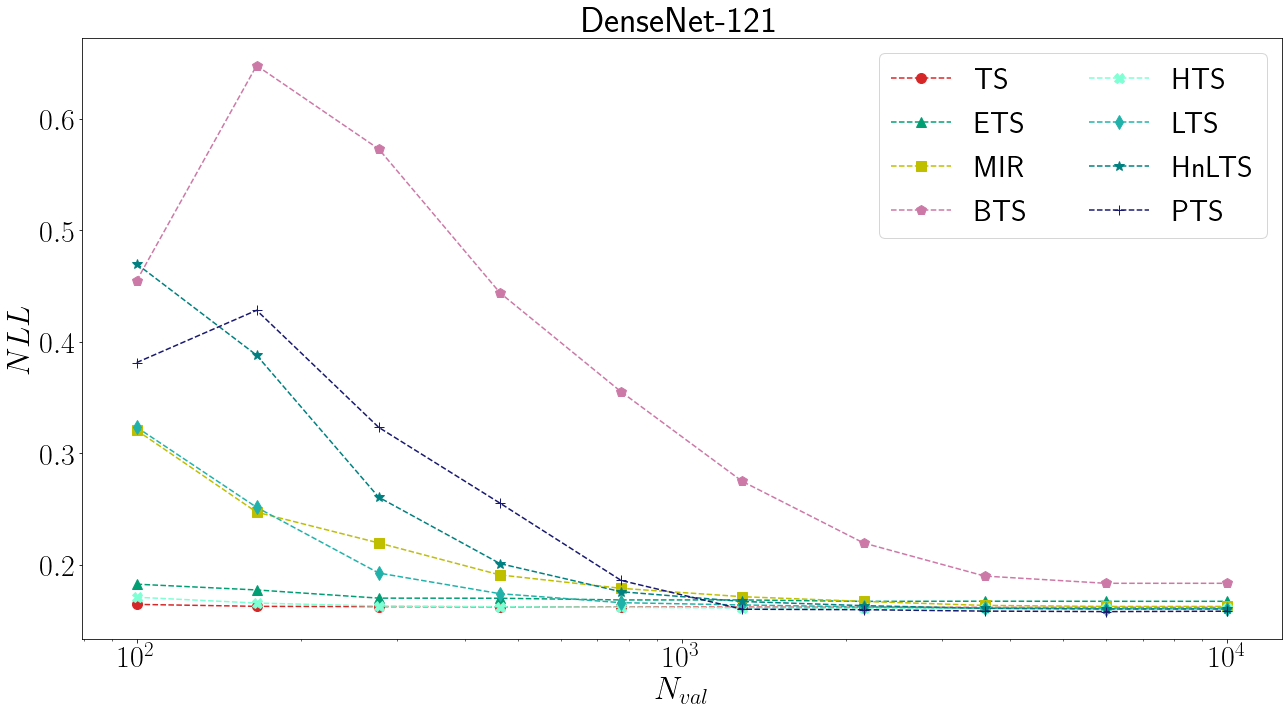

In [11]:
curr = NLL.loc["densenet-121"]
Ns = curr.index.values
uncal = curr.loc[Ns[0], 'Uncalibrated']
nlls = [curr[model].values for model in models]

fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color, marker) in enumerate(zip(labels, colors, markers)):
    ax.plot(Ns, nlls[i], ls='--', marker=marker, markersize=10, c=color, label=label)

ax.set_xscale('log')

ax.set_title('DenseNet-121', fontsize=36)

ax.set_ylabel('$NLL$', fontsize=32)
ax.set_xlabel('$N_{val}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=30, ncol=2)

plt.tight_layout()
plt.show();

plt.show()

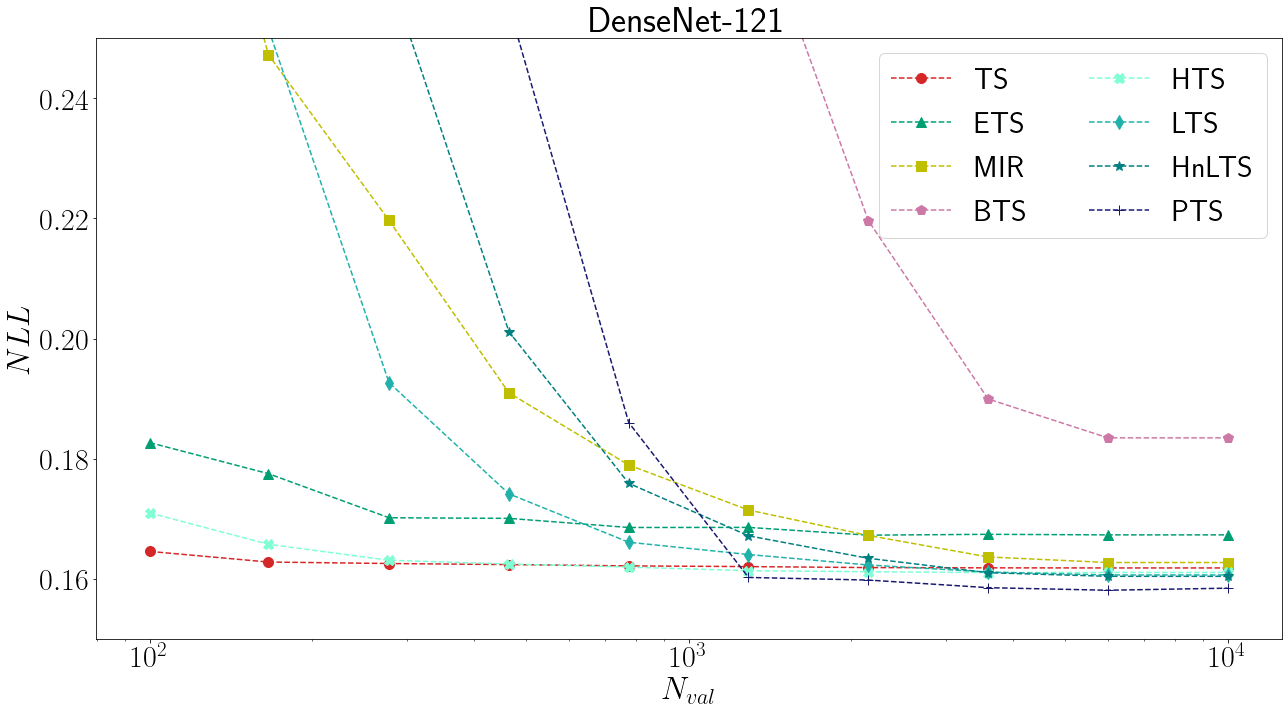

In [12]:
curr = NLL.loc["densenet-121"]
Ns = curr.index.values
uncal = curr.loc[Ns[0], 'Uncalibrated']
nlls = [curr[model].values for model in models]

fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color, marker) in enumerate(zip(labels, colors, markers)):
    ax.plot(Ns, nlls[i], ls='--', marker=marker, markersize=10, c=color, label=label)

ax.set_xscale('log')

ax.set_title('DenseNet-121', fontsize=36)

ax.set_ylabel('$NLL$', fontsize=32)
ax.set_xlabel('$N_{val}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=30, ncol=2)

ax.set_ylim(0.15, 0.25)

plt.tight_layout()
plt.show();

plt.show()

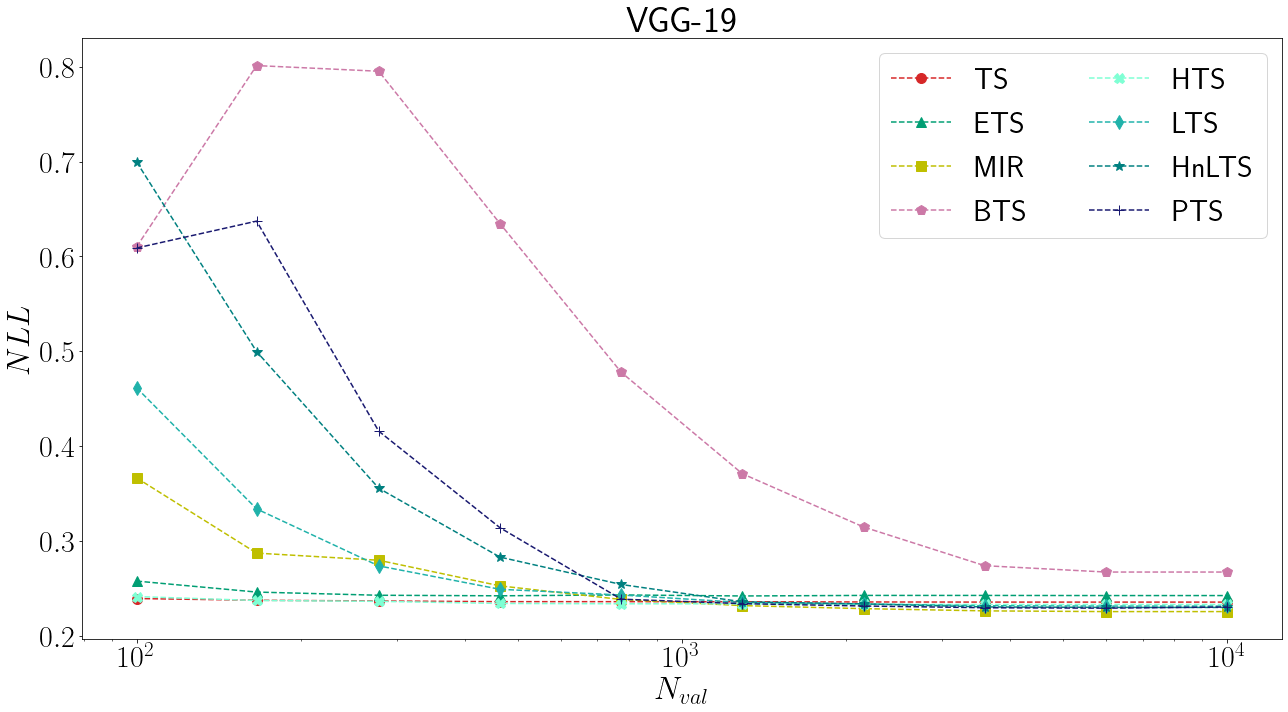

In [13]:
curr = NLL.loc["vgg-19"]
Ns = curr.index.values
uncal = curr.loc[Ns[0], 'Uncalibrated']
nlls = [curr[model].values for model in models]

fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color, marker) in enumerate(zip(labels, colors, markers)):
    ax.plot(Ns, nlls[i], ls='--', marker=marker, markersize=10, c=color, label=label)

ax.set_xscale('log')

ax.set_title('VGG-19', fontsize=36)

ax.set_ylabel('$NLL$', fontsize=32)
ax.set_xlabel('$N_{val}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=30, ncol=2)


plt.tight_layout()
plt.show();

plt.show()

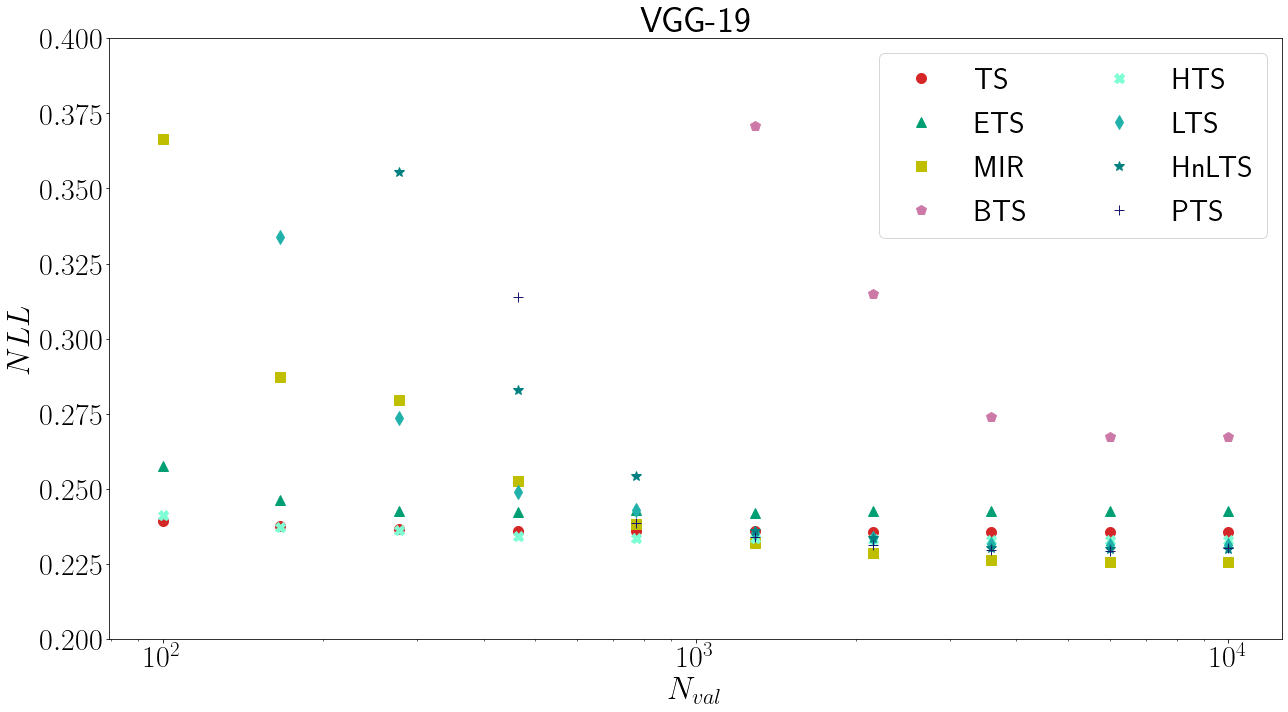

In [14]:
curr = NLL.loc["vgg-19"]
Ns = curr.index.values
uncal = curr.loc[Ns[0], 'Uncalibrated']
nlls = [curr[model].values for model in models]

fig, ax = plt.subplots(figsize=(18, 10))

for i, (label, color, marker) in enumerate(zip(labels, colors, markers)):
    ax.plot(Ns, nlls[i], ls='', marker=marker, markersize=10, c=color, label=label)

ax.set_xscale('log')

ax.set_title('VGG-19', fontsize=36)

ax.set_ylabel('$NLL$', fontsize=32)
ax.set_xlabel('$N_{val}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=30, ncol=2)

ax.set_ylim(0.2, 0.4)

plt.tight_layout()
plt.show();

plt.show()